# Census Analysis


### Import libraries, read files, and display census data:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
solar_data = pd.read_csv('solar_data.csv')
census_data = pd.read_csv('census_data.csv')
gas_meter_data = pd.read_csv('gas_meter_data.csv')

In [ ]:
# not reading bc takes too long
# meter_data0 = pd.read_csv('chunk0.csv')
# meter_data1 = pd.read_csv('chunk1.csv')
# meter_data2 = pd.read_csv('chunk2.csv')
# meter_data3 = pd.read_csv('chunk3.csv')
# meter_data4 = pd.read_csv('chunk4.csv')
# meter_data5 = pd.read_csv('chunk5.csv')
# meter_data6 = pd.read_csv('chunk6.csv')

In [14]:
print('HEAD', census_data.head())

HEAD       Block  Median Income  Employment Rate  Total Population  Poverty  \
0  812103-1          52154              565              1104       85   
1  811800-3          43850              548              1020       70   
2  812001-3          22670              340               807       79   
3  811900-1         110583              719              1179      120   
4  812101-1          70625             1154              2084      414   

   Total Housing Units  Renter-Occupied Units  Electric Heating Units  \
0                  435                    189                     122   
1                  463                    329                     153   
2                  483                    394                     188   
3                  425                    106                      42   
4                  874                    230                     129   

   Gas Heating Units  Oil Heating Units  ...  2010to2013  2000to2009  \
0                136                154

In [15]:
print('INFO', census_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Block                        40 non-null     object
 1   Median Income                40 non-null     int64 
 2   Employment Rate              40 non-null     int64 
 3   Total Population             40 non-null     int64 
 4   Poverty                      40 non-null     int64 
 5   Total Housing Units          40 non-null     int64 
 6   Renter-Occupied Units        40 non-null     int64 
 7   Electric Heating Units       40 non-null     int64 
 8   Gas Heating Units            40 non-null     int64 
 9   Oil Heating Units            40 non-null     int64 
 10  Median Year Structure Built  40 non-null     int64 
 11  after2014                    40 non-null     int64 
 12  2010to2013                   40 non-null     int64 
 13  2000to2009                   40 non-n

In [16]:
print('DESC', census_data.describe())

DESC        Median Income  Employment Rate  Total Population     Poverty  \
count      40.000000        40.000000          40.00000   40.000000   
mean    53865.275000       507.050000        1189.65000  129.850000   
std     31849.178925       330.179512         616.80914  120.983692   
min     10107.000000       133.000000         335.00000    1.000000   
25%     26263.250000       287.000000         804.00000   44.500000   
50%     51980.000000       393.000000        1023.50000   88.000000   
75%     70667.500000       621.500000        1412.00000  187.750000   
max    124728.000000      1524.000000        3039.00000  424.000000   

       Total Housing Units  Renter-Occupied Units  Electric Heating Units  \
count              40.0000              40.000000               40.000000   
mean              462.7250             247.675000              142.250000   
std               233.7984             203.066162              154.422622   
min               122.0000               0.0000

##### Preliminary data views show us that across blocks within this population (Western Mass homeowners), there are important differences. Notably, income differs greatly across blocks, which we will keep in mind as we proceed with selecting homes that can afford solar power.  

### Function to map house_ids to blocks:

In [12]:
blocks_and_house_ids = census_data[['Block','house_ids']]
solar_house_ids = solar_data['house_id']
house_id_to_block = {}

for solar_row in range(len (solar_data. index)) :
    for census_row in range (len (census_data.index)) :
        house_ids_as_list = blocks_and_house_ids ['house_ids']. loc[census_row]
        solar_house_id = solar_house_ids.loc [solar_row]
        if solar_house_id in house_ids_as_list:
            house_id_to_block.update({solar_house_id:blocks_and_house_ids ['Block'].loc[census_row]})

print(house_id_to_block.get("67741535"))   #prints block house is in

811900-1


### Graphs:

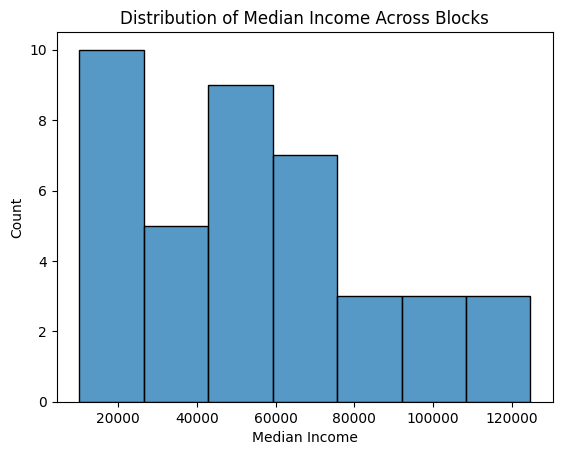

In [17]:
sns.histplot(census_data['Median Income'])
plt.title('Distribution of Median Income Across Blocks')
plt.show()

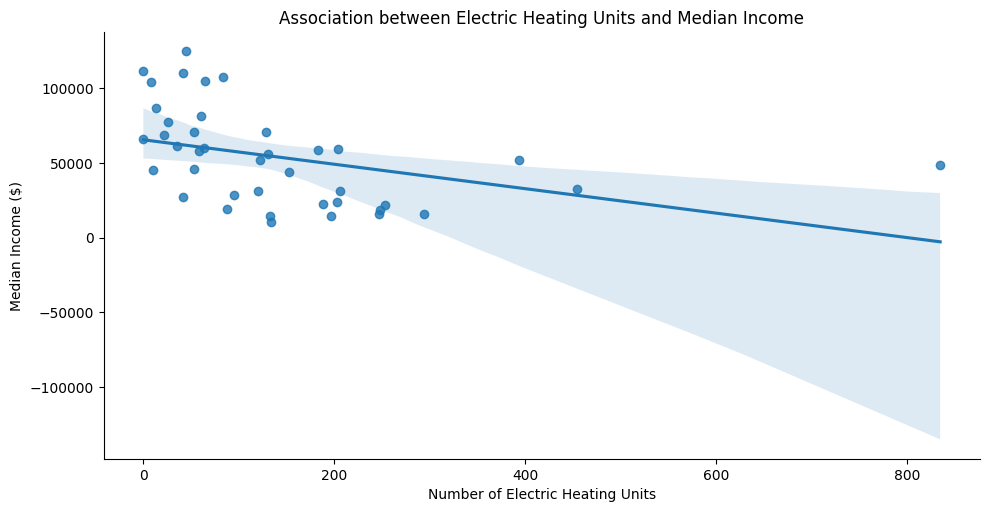

In [19]:
sns.lmplot(x='Electric Heating Units', y='Median Income', data=census_data, aspect=2)
plt.xlabel('Number of Electric Heating Units')
plt.ylabel('Median Income ($)')
plt.title('Association between Electric Heating Units and Median Income')
plt.show()

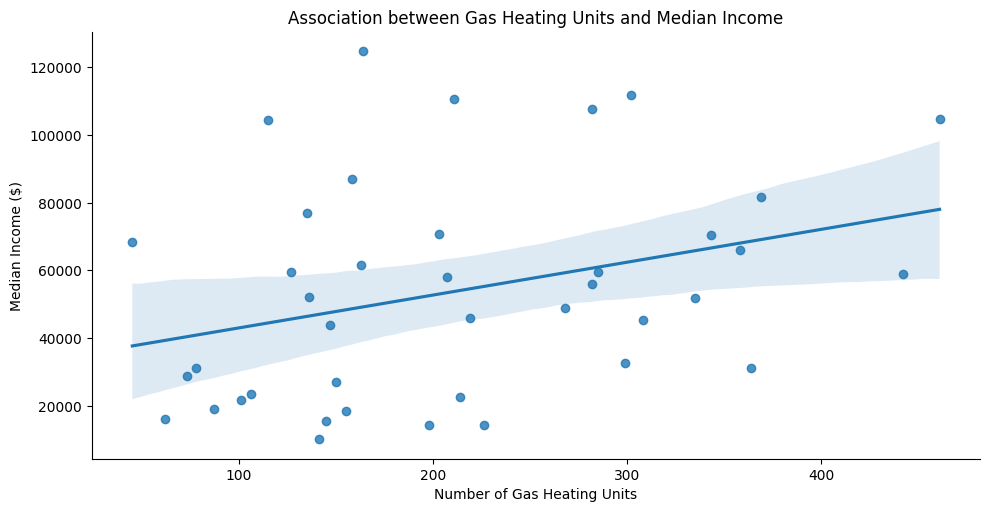

In [20]:
sns.lmplot(x='Gas Heating Units', y='Median Income', data=census_data, aspect=2)
plt.xlabel('Number of Gas Heating Units')
plt.ylabel('Median Income ($)')
plt.title('Association between Gas Heating Units and Median Income')
plt.show()

<Axes: >

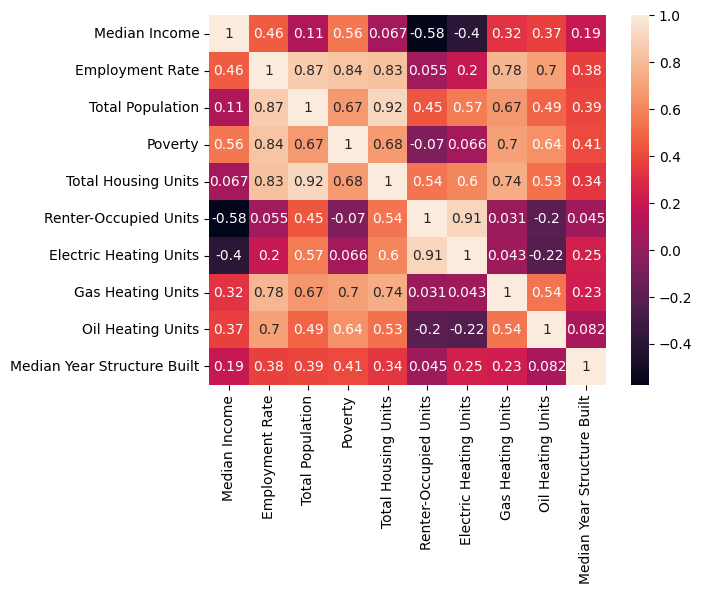

In [21]:
census_data_corr = census_data.drop(['Block', 'house_ids', 'after2014', '2010to2013', '2000to2009', '1990to1999', '1980to1989', '1970to1979', '1960to1969', '1950to1959', '1940to1949', 'pre1939'], axis = 1)
census_matrix = census_data_corr.corr()
sns.heatmap(census_matrix, annot=True)